In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from ucimlrepo import fetch_ucirepo
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import utils_data as u
from sklearn.preprocessing import StandardScaler

In [3]:
dataset_filename = Path('./steel_industry_energy_consumption.parquet')
if dataset_filename.exists():
    df = pd.read_parquet(dataset_filename)
else:
    # fetch dataset
    steel_industry_energy_consumption = fetch_ucirepo(id=851)
    df = pd.DataFrame(steel_industry_energy_consumption.data.original)
    df.to_parquet('steel_industry_energy_consumption.parquet')

In [4]:
df.Load_Type.value_counts()

Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

In [6]:
# Hacemos una diferenciación entre fines de semana y días hábiles
df['IsWeekend'] = df['WeekStatus'] == 'Weekend'
df.drop(['WeekStatus'], axis=1, inplace=True)

In [7]:
# Utilizamos One Hot Enconder eliminando las columnas iniciales
df = pd.get_dummies(df, columns=["Day_of_week", "Load_Type"], drop_first=False)

In [8]:
df.columns.to_list()

['date',
 'Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM',
 'IsWeekend',
 'Day_of_week_Friday',
 'Day_of_week_Monday',
 'Day_of_week_Saturday',
 'Day_of_week_Sunday',
 'Day_of_week_Thursday',
 'Day_of_week_Tuesday',
 'Day_of_week_Wednesday',
 'Load_Type_Light_Load',
 'Load_Type_Maximum_Load',
 'Load_Type_Medium_Load']

In [9]:
df.sample(n=9)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,IsWeekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
10295,2018-04-18 06:00:00,3.06,3.71,0.00,0.00,63.63,100.00,21600,False,False,False,False,False,False,False,True,True,False,False
2266,2018-01-24 14:45:00,95.65,47.84,0.00,0.04,89.44,100.00,53100,False,False,False,False,False,False,False,True,False,False,True
25785,2018-09-26 14:30:00,2.59,0.00,11.88,0.00,100.00,21.30,52200,False,False,False,False,False,False,False,True,True,False,False
33648,2018-12-17 12:15:00,11.12,0.86,18.65,0.01,99.70,51.21,44100,False,False,True,False,False,False,False,False,False,False,True
8844,2018-04-03 03:15:00,3.67,4.46,0.00,0.00,63.54,100.00,11700,False,False,False,False,False,False,True,False,True,False,False
6333,2018-03-07 23:30:00,3.02,2.30,0.04,0.00,79.56,99.99,84600,False,False,False,False,False,False,False,True,True,False,False
21049,2018-08-08 06:30:00,3.17,6.30,0.00,0.00,44.95,100.00,23400,False,False,False,False,False,False,False,True,True,False,False
33494,2018-12-15 21:45:00,4.25,0.00,22.36,0.00,100.00,18.67,78300,True,False,False,True,False,False,False,False,True,False,False
7338,2018-03-18 10:45:00,3.17,0.00,18.00,0.00,100.00,17.34,38700,True,False,False,False,True,False,False,False,True,False,False


In [10]:
# Crear nuevas columnas descomponiendo la fecha y hora en sus componentes
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['second'] = df['date'].dt.second
df['dayofweek'] = df['date'].dt.dayofweek  # Lunes=0, Domingo=6
df['dayofyear'] = df['date'].dt.dayofyear
df['weekofyear'] = df['date'].dt.isocalendar().week
df['quarter'] = df['date'].dt.quarter

In [11]:
df.describe()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,year,month,day,hour,minute,second,dayofweek,dayofyear,weekofyear,quarter
count,35040,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.0,35040.000000,35040.000000,35040.000000,35040.000000,35040.0,35040.000000,35040.000000,35040.0,35040.000000
mean,2018-07-02 11:52:30,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,2018.0,6.526027,15.720548,11.500000,22.500000,0.0,2.991781,183.000000,26.430137,2.509589
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.0,1.000000
25%,2018-04-02 05:56:15,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,2018.0,4.000000,8.000000,5.750000,11.250000,0.0,1.000000,92.000000,13.0,2.000000
50%,2018-07-02 11:52:30,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,2018.0,7.000000,16.000000,11.500000,22.500000,0.0,3.000000,183.000000,26.0,3.000000
75%,2018-10-01 17:48:45,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,2018.0,10.000000,23.000000,17.250000,33.750000,0.0,5.000000,274.000000,39.0,4.000000
max,2018-12-31 23:45:00,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,2018.0,12.000000,31.000000,23.000000,45.000000,0.0,6.000000,365.000000,52.0,4.000000
std,NaN,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317,0.0,3.447901,8.796373,6.922285,16.770749,0.0,2.003433,105.367532,15.047125,1.116783


In [12]:
df.drop(["year", "second", "date"], axis=1, inplace=True) # No tienen variabilidad

In [13]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled_ = pd.DataFrame(df_scaled, columns=df.columns) 

In [14]:
y = df_scaled_['Usage_kWh']
X = df_scaled_.drop(['Usage_kWh'], axis=1)

In [15]:
dataset_filename = Path('./steel_industry_energy_consumption_features_importances.parquet')
if dataset_filename.exists():
    df_features_importances = pd.read_parquet(dataset_filename)
else:
    data = u.DataFeaturesImportances(X, y)
    df_features_importances = data.get_feature_importance_matrix()
    df_features_importances.to_parquet('steel_industry_energy_consumption_features_importances.parquet')

In [16]:
# df_features_importances.sort_values(by=['XGBoost'], ascending=False)

In [17]:
# df_features_importances[["Feature","Random Forest"]]

<Axes: >

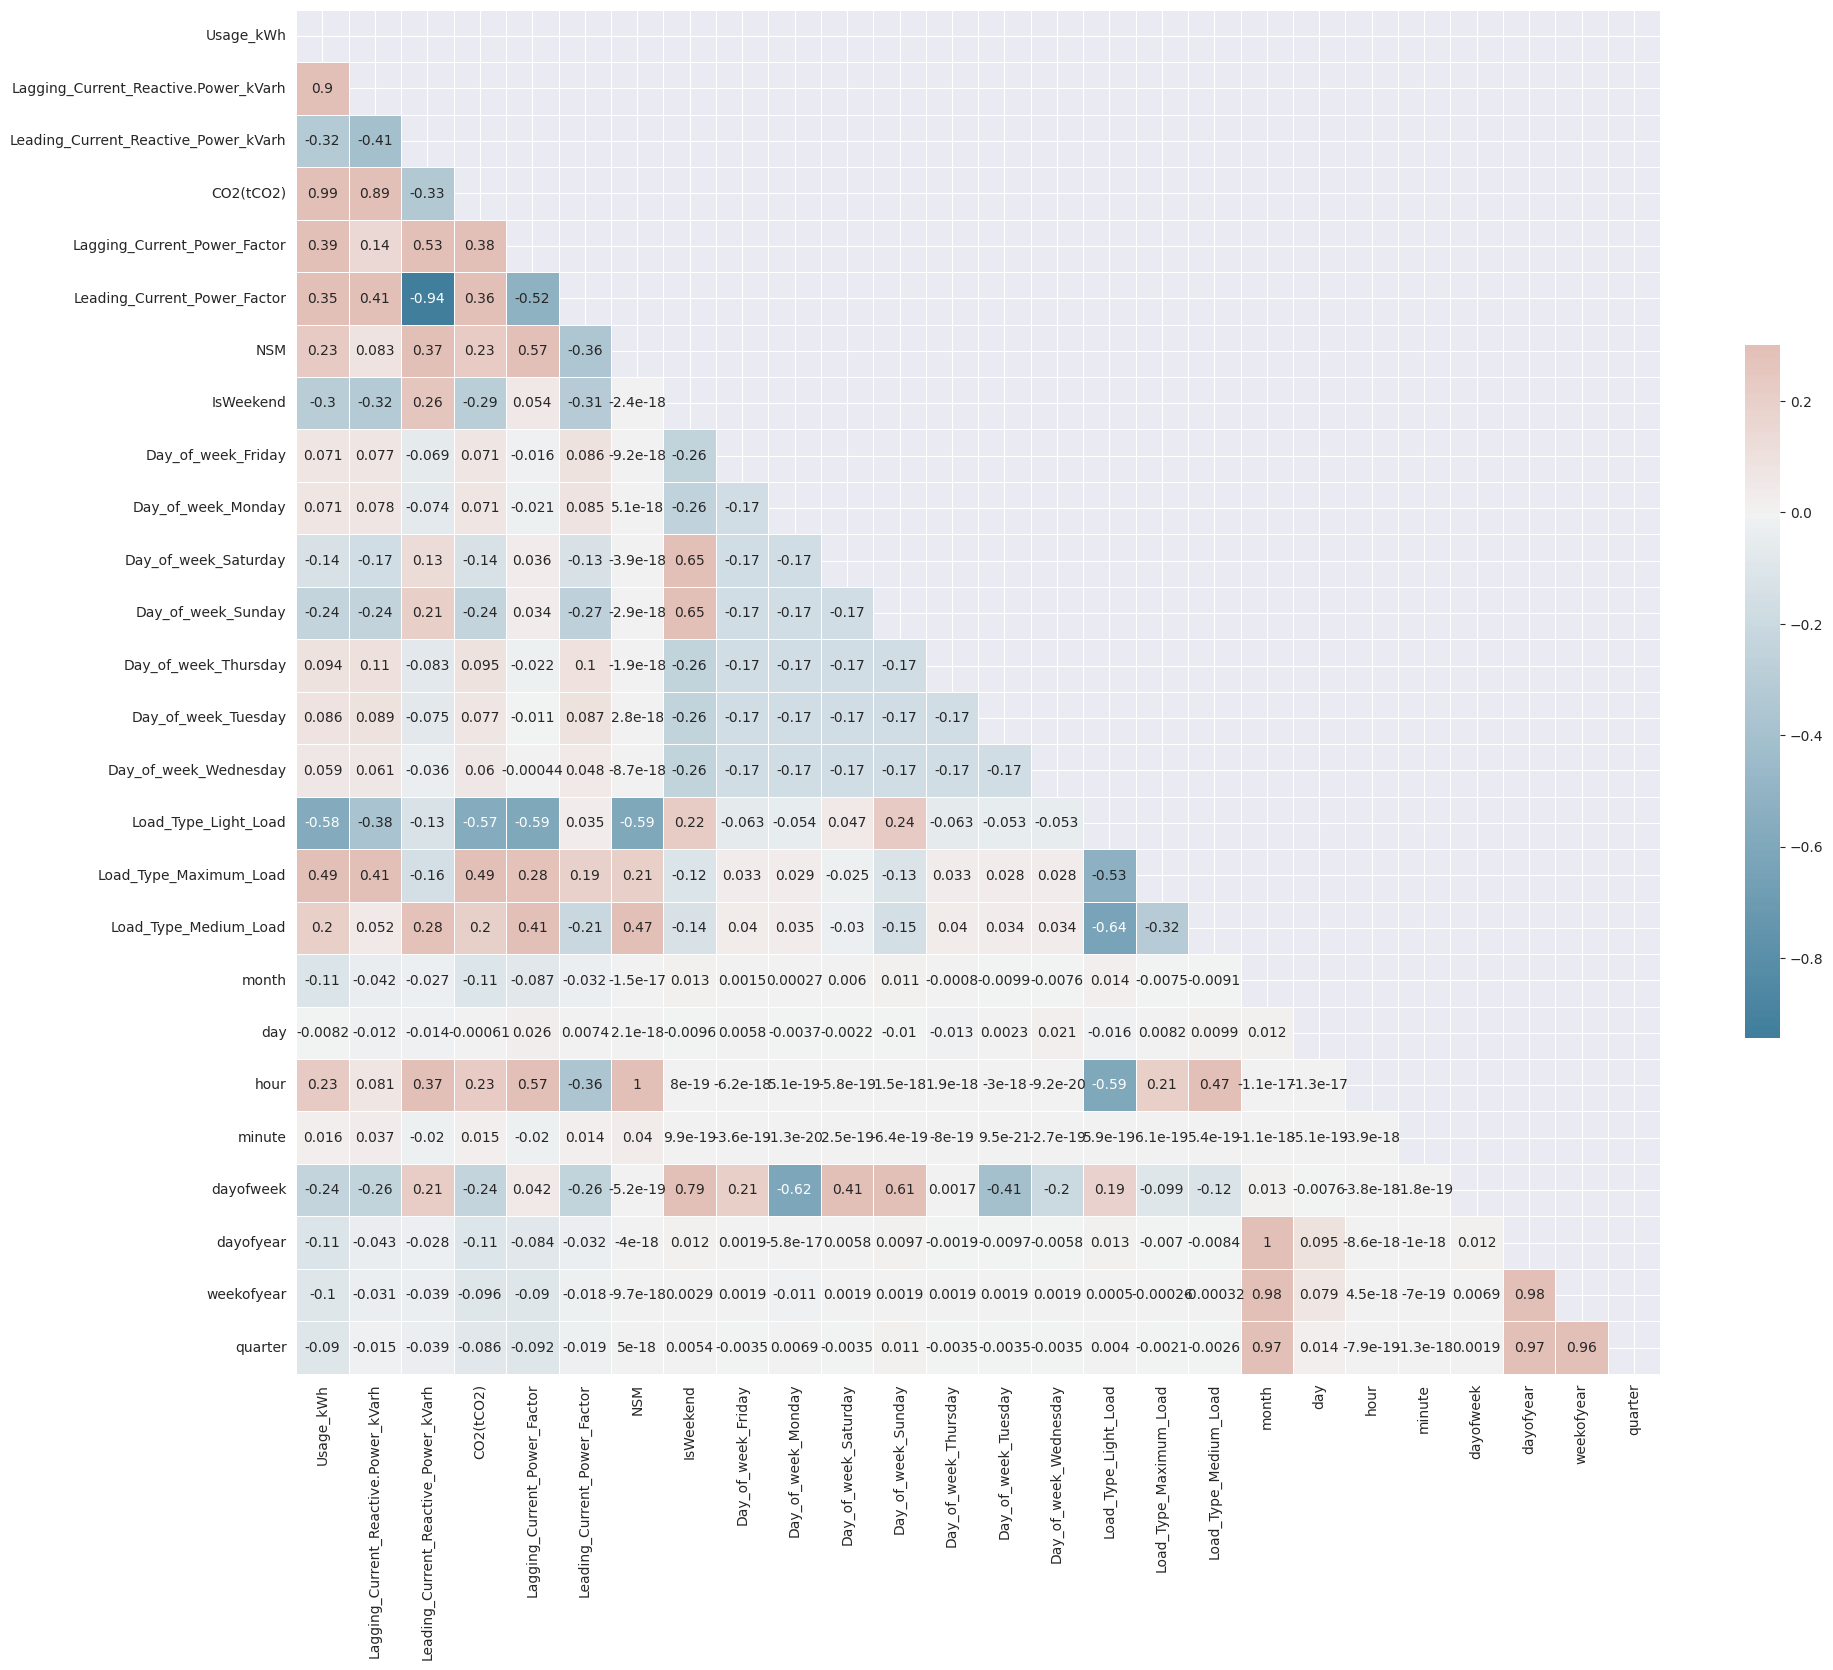

In [18]:
corr = df_scaled_.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, annot=True, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
df_features_importances

,Feature,Random Forest,RF Permutation,Lasso,XGBoost
0,Lagging_Current_Reactive.Power_kVarh,0.015493,1.047339e+00,0.162085,0.009597
1,Leading_Current_Reactive_Power_kVarh,0.000329,1.339692e-03,0.003322,0.000787
2,CO2(tCO2),0.975624,9.845088e-01,0.788306,0.973625
3,Lagging_Current_Power_Factor,0.004746,3.196618e-02,0.067299,0.002286
4,Leading_Current_Power_Factor,0.001223,5.016109e-03,0.043222,0.004278
5,NSM,0.000991,4.782177e-03,-0.000137,0.000870
6,IsWeekend,0.000040,1.672853e-05,0.000000,0.001291
7,Day_of_week_Friday,0.000011,1.435298e-06,-0.000111,0.000131
8,Day_of_week_Monday,0.000010,1.241500e-06,-0.000272,0.000247
9,Day_of_week_Saturday,0.000008,3.359862e-06,0.000000,0.000160


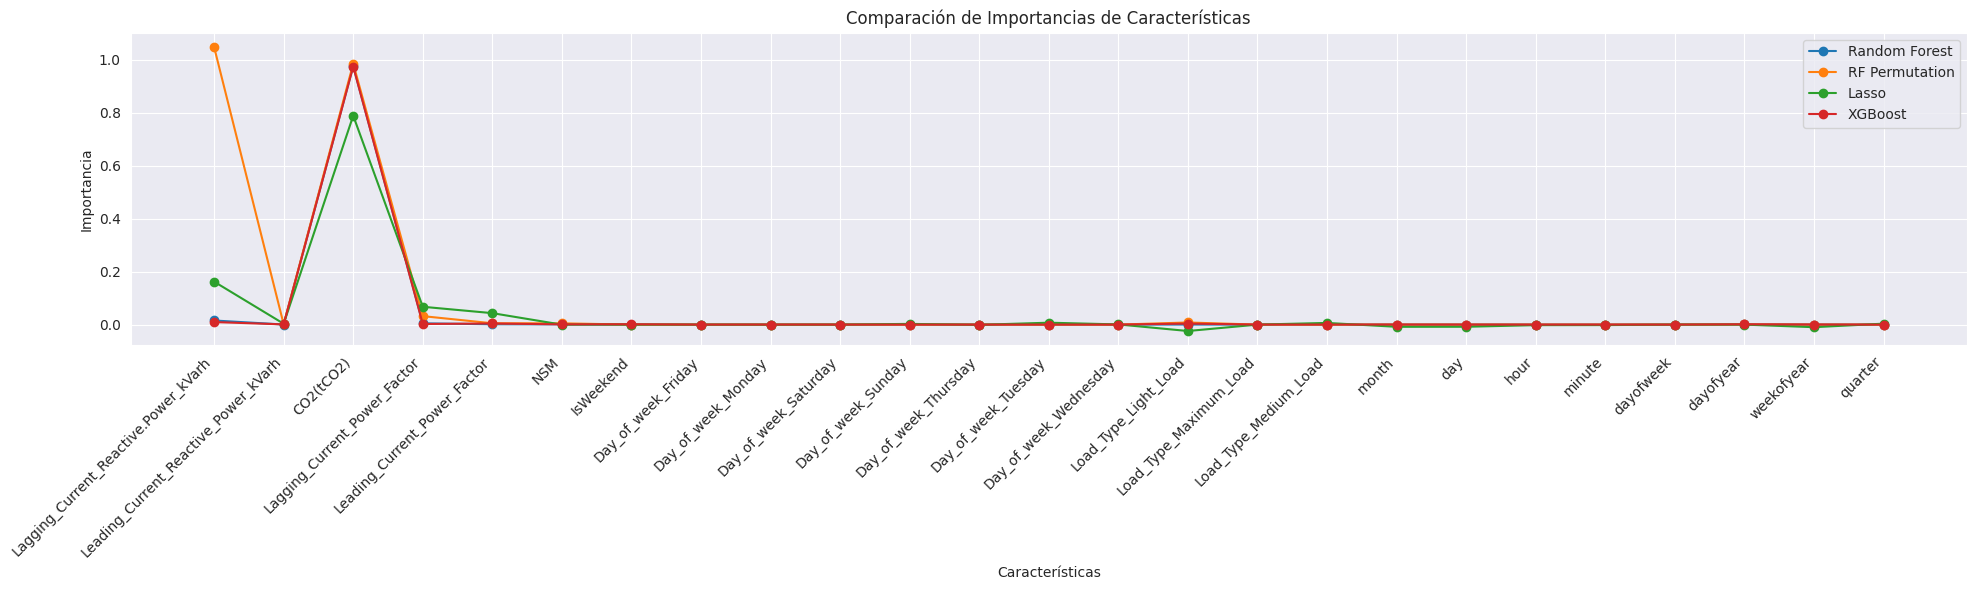

In [20]:
# Configuración de la gráfica
plt.figure(figsize=(20, 6))

# Iterar sobre las columnas excepto 'Feature'
for column in df_features_importances.columns[1:]:
    plt.plot(df_features_importances['Feature'], df_features_importances[column], marker='o', label=column)

# Configuración del gráfico
plt.title('Comparación de Importancias de Características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=45, ha='right')

# Ajustar el alcance del eje y y los ticks
#plt.ylim(-1, 2)
#plt.yticks(np.arange(-1, 1, 0.5))

plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Veamos como aporta los campos que creamos a partir de "date"

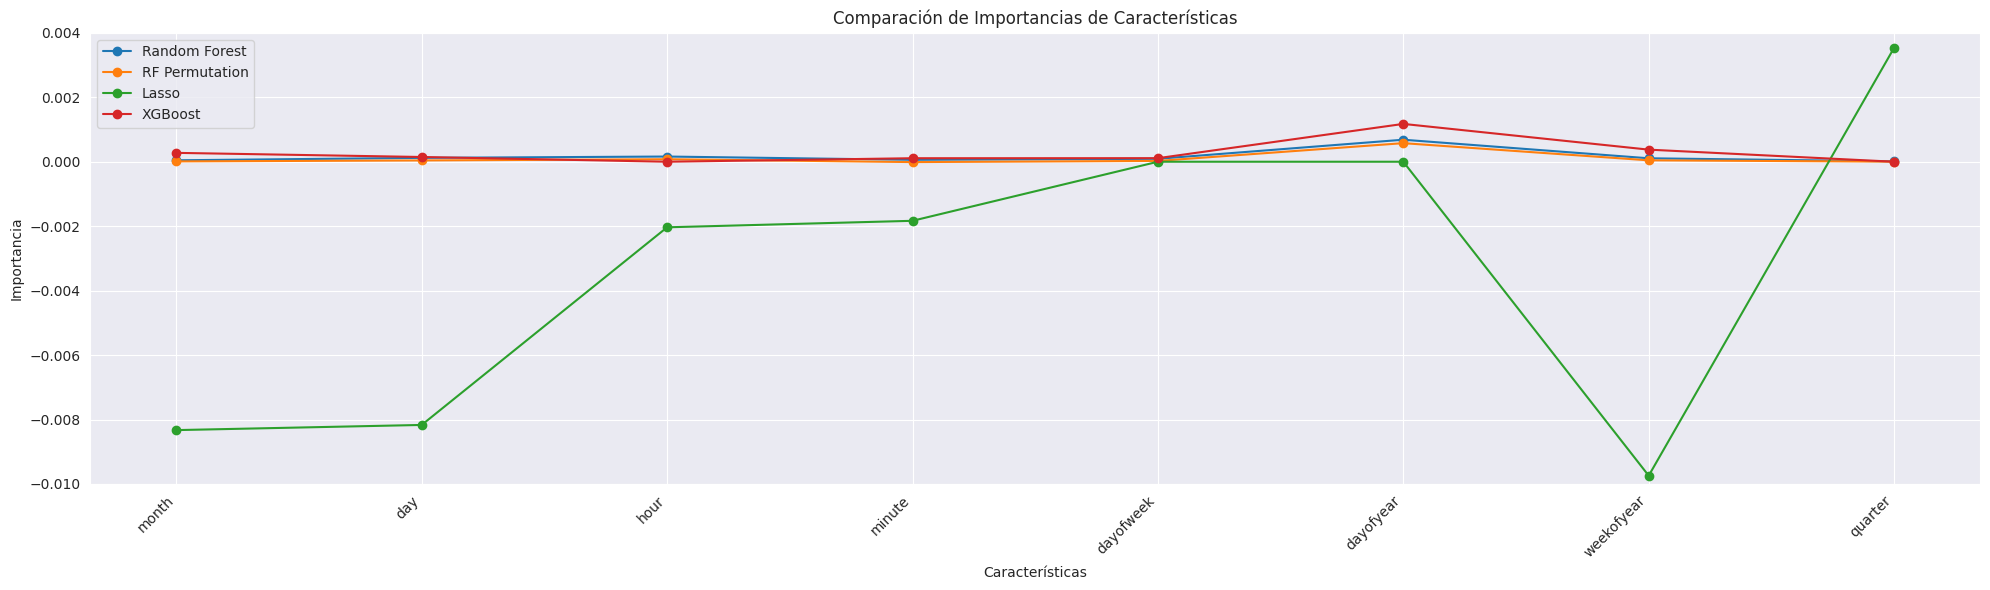

In [21]:
df_filtered = df_features_importances[df_features_importances['Feature'].isin(['month', 'day', 'hour', 'minute', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter'])]

# Configuración de la gráfica
plt.figure(figsize=(20, 6))

# Iterar sobre las columnas excepto 'Feature'
for column in df_filtered.columns[1:]:
    plt.plot(df_filtered['Feature'], df_filtered[column], marker='o', label=column)

# Configuración del gráfico
plt.title('Comparación de Importancias de Características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=45, ha='right')

# Ajustar el alcance del eje y y los ticks
plt.ylim(-0.01, 0.004)
#plt.yticks(np.arange(-0.01, 0.004, 0.00025))

plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Veamos como aportan los campos del dataset

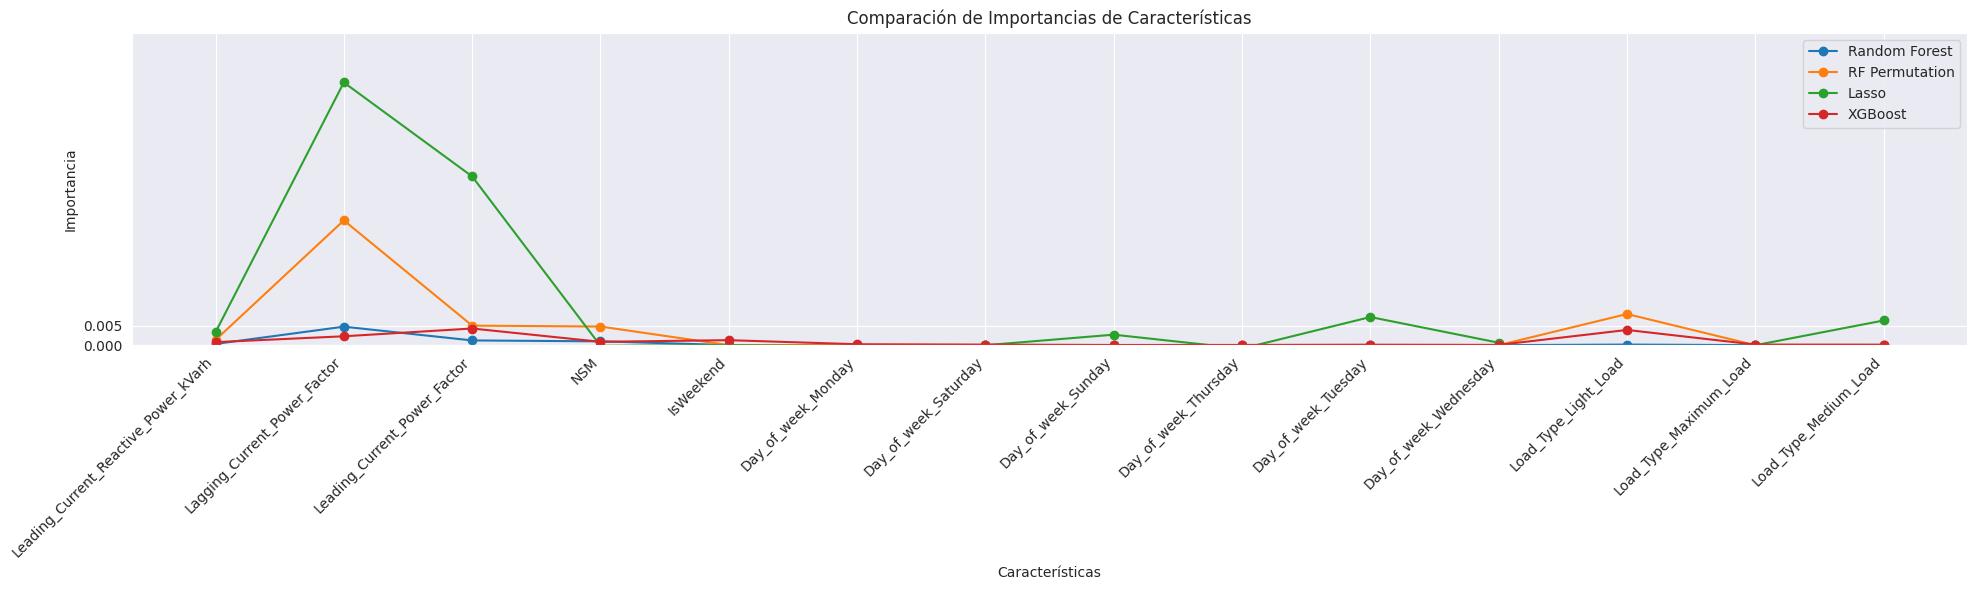

In [22]:
df_filtered = df_features_importances[df_features_importances['Feature'].isin( ['Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'IsWeekend', 'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday','Day_of_week_Monday', 'Load_Type_Maximum_Load','Load_Type_Medium_Load', 'Load_Type_Light_Load'])]

# Configuración de la gráfica
plt.figure(figsize=(20, 12))

# Iterar sobre las columnas excepto 'Feature'
for column in df_filtered.columns[1:]:
    plt.plot(df_filtered['Feature'], df_filtered[column], marker='o', label=column)

# Configuración del gráfico
plt.title('Comparación de Importancias de Características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=45, ha='right')

# Ajustar el alcance del eje y y los ticks
plt.ylim(0, 0.08)
plt.yticks(np.arange(0, 0.01, 0.005))

plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Del gráfico anterior enfocamos los que son pequeños

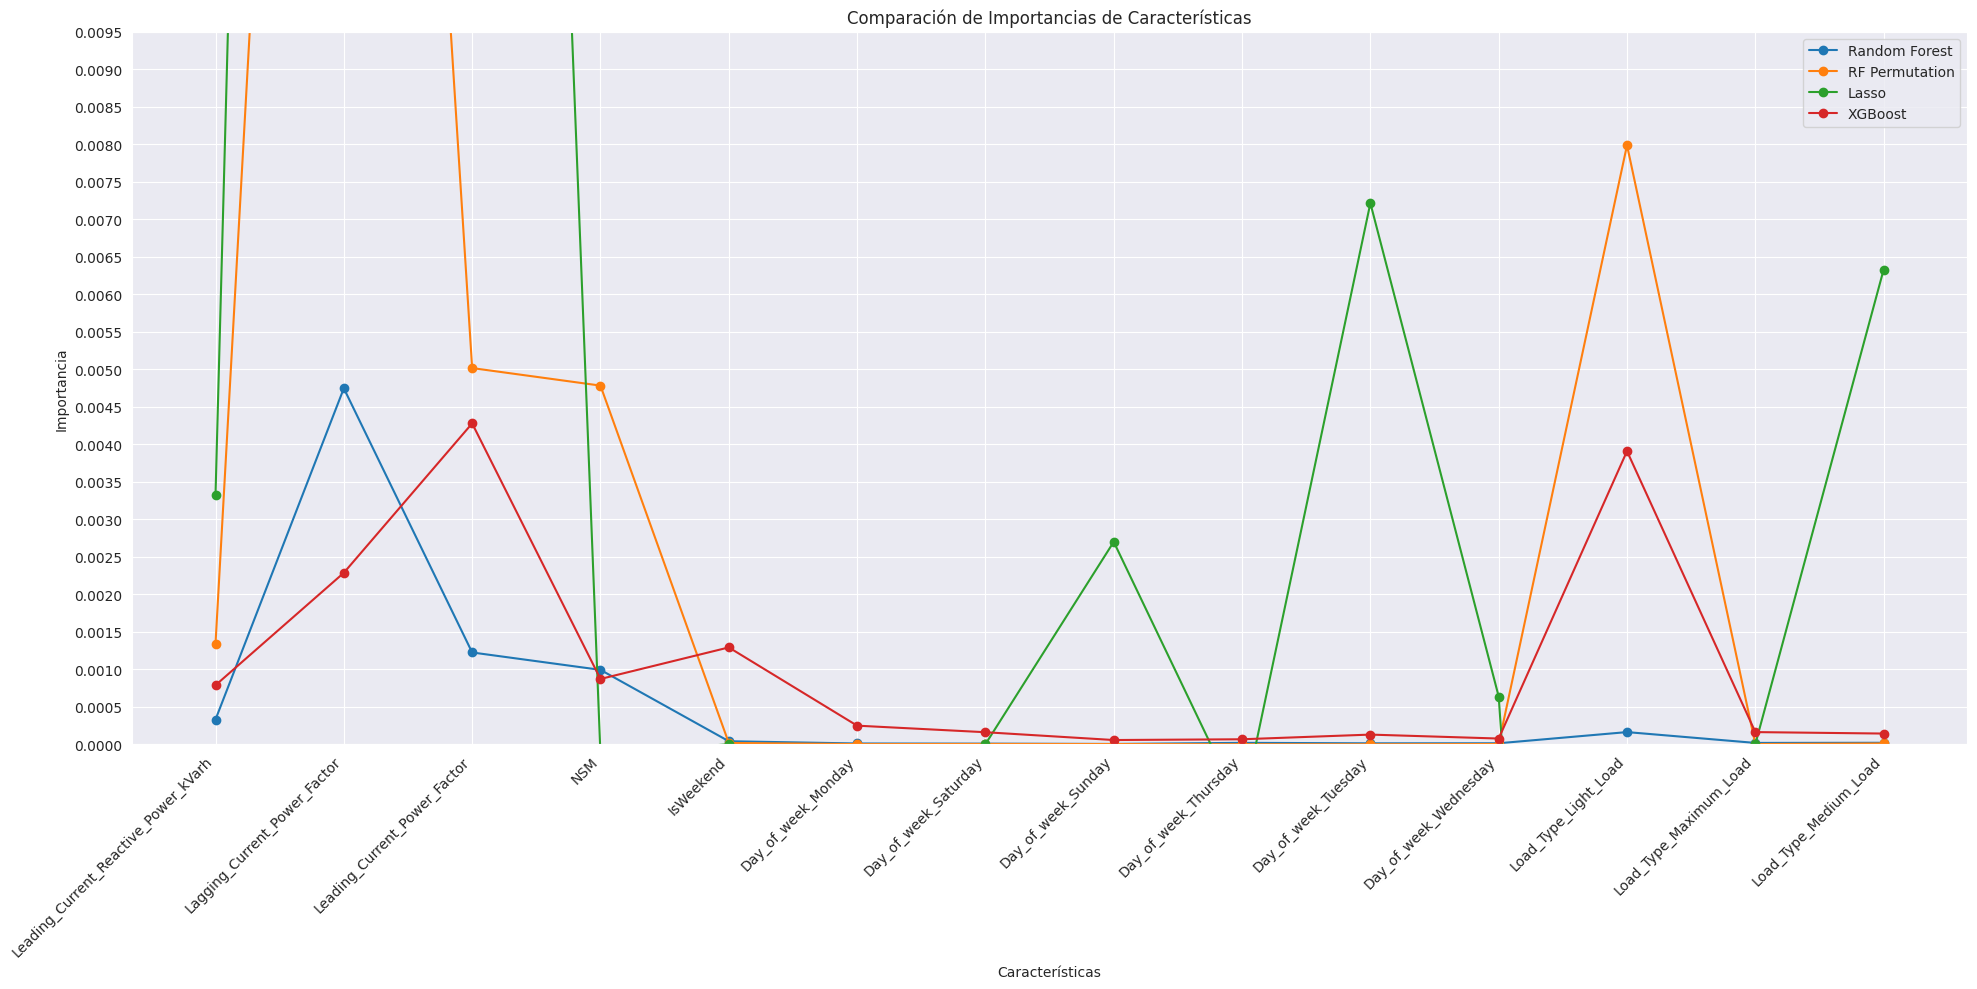

In [23]:
df_filtered = df_features_importances[df_features_importances['Feature'].isin( ['Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'IsWeekend', 'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'Day_of_week_Monday', 'Load_Type_Maximum_Load', 'Load_Type_Medium_Load', 'Load_Type_Light_Load'])]

# Configuración de la gráfica
plt.figure(figsize=(20, 10))

# Iterar sobre las columnas excepto 'Feature'
for column in df_filtered.columns[1:]:
    plt.plot(df_filtered['Feature'], df_filtered[column], marker='o', label=column)

# Configuración del gráfico
plt.title('Comparación de Importancias de Características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=45, ha='right')

# Ajustar el alcance del eje y y los ticks
plt.ylim(0, 0.005)
plt.yticks(np.arange(0, 0.01, 0.0005))

plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## La data generada a partir de "date" no aporta a la variable objetivo, como se visualizó en el EDA, y ahora como se visualiza en el análisis de Feature Importances, por lo tanto será eliminada y no será parte del análisis.  

### Ver resultados BORUTA en: "Efficient energy consumption prediction model for a data analytic-enabled industry building in a smart city"

V E, S., Shin, C., & Cho, Y. (2020). Efficient energy consumption prediction model for a data analytic-enabled industry building in a smart city. Building Research & Information, 49(1), 127–143. https://doi.org/10.1080/09613218.2020.1809983


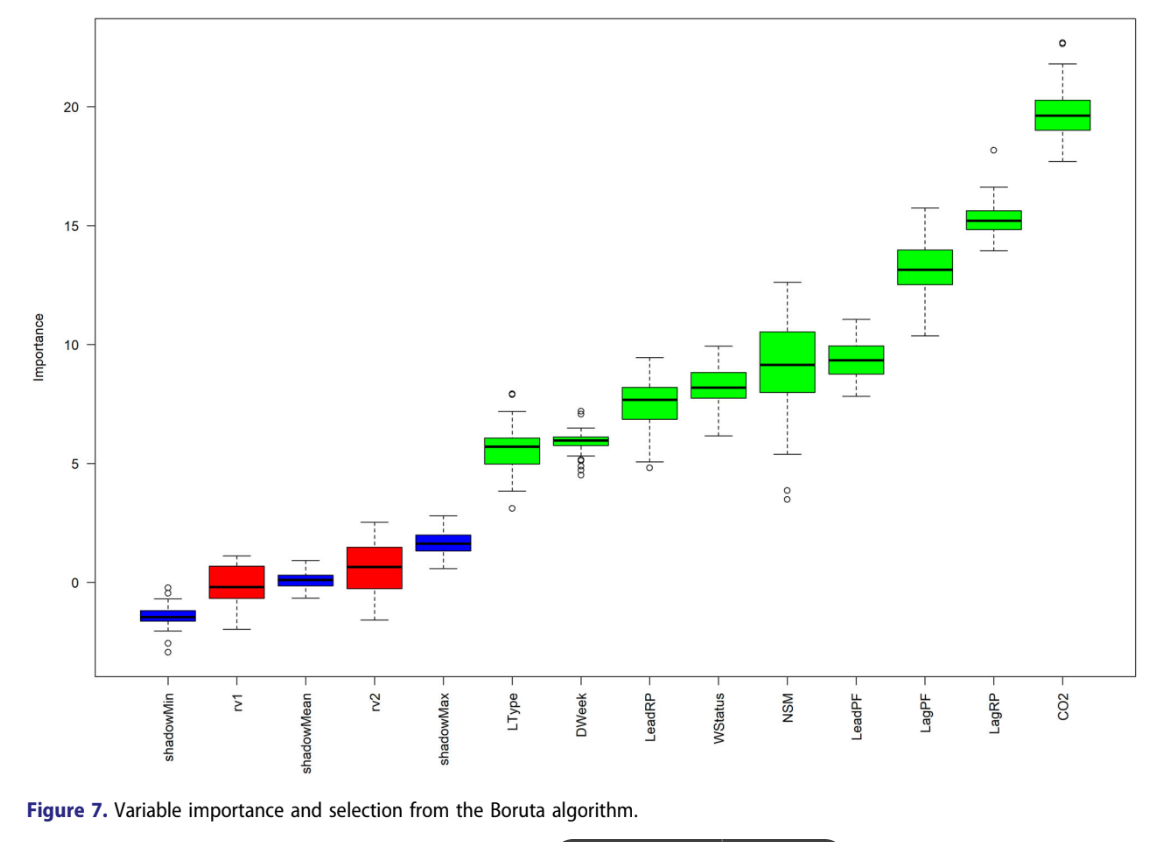

In [24]:
from IPython.display import Image, display

# Especificar la ruta de la imagen
image_path = 'referencia-boruta.png'

# Cargar y mostrar la imagen
display(Image(filename=image_path))


In [25]:
df = pd.read_parquet('steel_industry_energy_consumption.parquet')

In [26]:
df.drop(["date"], axis=1, inplace=True)
df['IsWeekend'] = df['WeekStatus'] == 'Weekend'
df.drop(['WeekStatus'], axis=1, inplace=True)
df = pd.get_dummies(df, columns=["Day_of_week", "Load_Type"])

In [27]:
df.columns.to_list()

['Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM',
 'IsWeekend',
 'Day_of_week_Friday',
 'Day_of_week_Monday',
 'Day_of_week_Saturday',
 'Day_of_week_Sunday',
 'Day_of_week_Thursday',
 'Day_of_week_Tuesday',
 'Day_of_week_Wednesday',
 'Load_Type_Light_Load',
 'Load_Type_Maximum_Load',
 'Load_Type_Medium_Load']

In [28]:
df.to_parquet('steel-dataset.parquet')